<a href="https://colab.research.google.com/github/DannyNguyen24-Vietnam/Artificial-Intellgence-Course---HCMUTE---Practice02---Week04/blob/main/ARIN_Course_Practice02_Week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=87f49a269af9b327954e46f4ad43ee1ce716d0b12b22b610812f7af0172ce9e8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

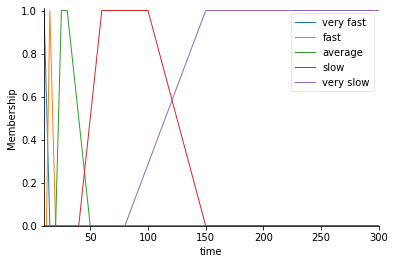

In [11]:
# Generate data - Cooking Time
time = ctrl.Antecedent(np.arange(10, 301, 1), 'time')
time['very fast'] = fuzz.trimf(time.universe, [10, 10, 15])
time['fast'] = fuzz.trimf(time.universe, [12, 15, 20])
time['average'] = fuzz.trapmf(time.universe, [20,  25, 30, 50])
time['slow'] = fuzz.trapmf(time.universe, [40, 60, 100, 150])
time['very slow'] = fuzz.trapmf(time.universe, [80, 150, 300, 300])

# Visualization
time.view()

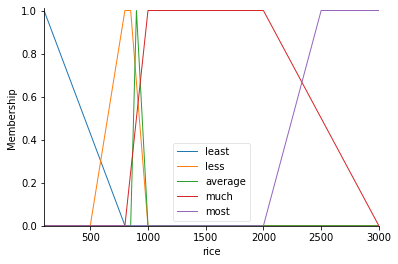

In [12]:
# Generate data - Rice Amount
rice = ctrl.Antecedent(np.arange(100, 3001, 1), 'rice')
rice['least'] = fuzz.trimf(rice.universe, [100, 100, 800])
rice['less'] = fuzz.trapmf(rice.universe, [500, 800, 850, 1000])
rice['average'] = fuzz.trimf(rice.universe, [850,  900, 1000])
rice['much'] = fuzz.trapmf(rice.universe, [800, 1000, 2000, 3000])
rice['most'] = fuzz.trapmf(rice.universe, [2000, 2500, 3000, 3000])

# Visualization
rice.view()

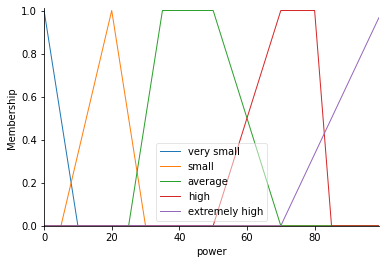

In [22]:
# Generate data - Usage Power
power = ctrl.Consequent(np.arange(0, 100, 1), 'power')
power['very small'] = fuzz.trimf(power.universe, [0, 0, 10])
power['small'] = fuzz.trimf(power.universe, [5, 20, 30])
power['average'] = fuzz.trapmf(power.universe, [25,  35, 50, 70])
power['high'] = fuzz.trapmf(power.universe, [50, 70, 80, 85])
power['extremely high'] = fuzz.trimf(power.universe, [70, 100, 100])

# Visualization
power.view()

In [23]:
# Rules
rule_1 = ctrl.Rule(rice['least']&time['very fast'], power['high'])
rule_2 = ctrl.Rule(rice['less']&time['very fast'], power['high'])
rule_3 = ctrl.Rule(rice['average']&time['very fast'], power['high'])
rule_4 = ctrl.Rule(rice['much']&time['very fast'], power['extremely high'])
rule_5 = ctrl.Rule(rice['most']&time['very fast'], power['extremely high'])

rule_6  = ctrl.Rule(rice['least']&time['fast'], power['average'])
rule_7  = ctrl.Rule(rice['less']&time['fast'], power['average'])
rule_8  = ctrl.Rule(rice['average']&time['fast'], power['high'])
rule_9  = ctrl.Rule(rice['much']&time['fast'], power['extremely high'])
rule_10 = ctrl.Rule(rice['most']&time['fast'], power['extremely high'])

rule_11 = ctrl.Rule(rice['least']&time['average'], power['average'])
rule_12 = ctrl.Rule(rice['less']&time['average'], power['average'])
rule_13 = ctrl.Rule(rice['average']&time['average'], power['average'])
rule_14 = ctrl.Rule(rice['much']&time['average'], power['average'])
rule_15 = ctrl.Rule(rice['most']&time['average'], power['average'])

rule_16 = ctrl.Rule(rice['least']&time['slow'], power['very small'])
rule_17 = ctrl.Rule(rice['less']&time['slow'], power['very small'])
rule_18 = ctrl.Rule(rice['average']&time['slow'], power['small'])
rule_19 = ctrl.Rule(rice['much']&time['slow'], power['small'])
rule_20 = ctrl.Rule(rice['most']&time['slow'], power['small'])

rule_21 = ctrl.Rule(rice['least']&time['very slow'], power['very small'])
rule_22 = ctrl.Rule(rice['less']&time['very slow'], power['very small'])
rule_23 = ctrl.Rule(rice['average']&time['very slow'], power['very small'])
rule_24 = ctrl.Rule(rice['much']&time['very slow'], power['very small'])
rule_25 = ctrl.Rule(rice['most']&time['very slow'], power['very small'])

In [24]:
# Control system (simplest)
power_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5,
                                 rule_6, rule_7, rule_8, rule_9, rule_10,
                                 rule_11, rule_12, rule_13, rule_14, rule_15,
                                 rule_16, rule_17, rule_18, rule_19, rule_20,
                                 rule_21, rule_22, rule_23, rule_24, rule_25,
                                 ])
powering= ctrl.ControlSystemSimulation(power_ctrl)

Predicted: {pow} %


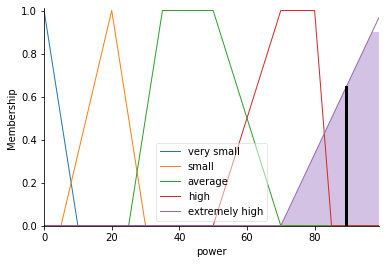

In [28]:
# Test an instance
powering.input['time'] = 10.5    # About 10.5 mins
powering.input['rice'] = 2500    # 2.5kg of rice
powering.compute()

# Print
dis_str = "Predicted: {pow} %"
dis_str.format(pow = powering.output['power'])
print(dis_str)
power.view(sim = powering)

Predicted: {pow} %


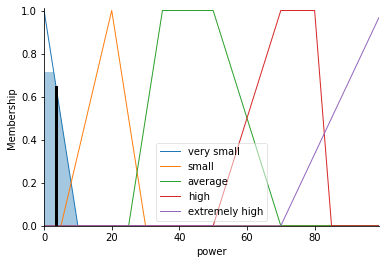

In [30]:
# Test an instance
powering.input['time'] = 180   # About 3 hrs
powering.input['rice'] = 300   # 300g of rice
powering.compute()

# Print
dis_str = "Predicted: {pow} %"
dis_str.format(pow = powering.output['power'])
print(dis_str)
power.view(sim = powering)